In [12]:
from pyforest import *  # By importing pyforest, we don't need to include the package of pandas and numpy.
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import metrics
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [13]:
churn = pd.read_csv('Employee_Churn.csv')
churn.head()

<IPython.core.display.Javascript object>

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
churn.describe()    # describe() gives us the information of the numerical features. 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
churn.info()   # info() gives us the information of all the attributes' datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [16]:
churn.isnull().sum()       # isnull() let's us know if there is any null values in any particular feature.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [17]:
churn.memory_usage(deep=True)    # memory_usage gives us the clear idea of which attribute consumes more memory in bytes.

Index                          128
Age                          11760
Attrition                    86967
BusinessTravel              103558
DailyRate                    11760
Department                  108107
DistanceFromHome             11760
Education                    11760
EducationField               99274
EmployeeCount                11760
EmployeeNumber               11760
EnvironmentSatisfaction      11760
Gender                       90846
HourlyRate                   11760
JobInvolvement               11760
JobLevel                     11760
JobRole                     110354
JobSatisfaction              11760
MaritalStatus                93937
MonthlyIncome                11760
MonthlyRate                  11760
NumCompaniesWorked           11760
Over18                       91140
OverTime                     87146
PercentSalaryHike            11760
PerformanceRating            11760
RelationshipSatisfaction     11760
StandardHours                11760
StockOptionLevel    

In [18]:
churn.BusinessTravel.value_counts()   # value_counts() let's us know the particular data appears how many times in a particular column.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [19]:
churn.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [20]:
churn.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [21]:
churn.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder       # helps us to convert categorical into numerical.
le=LabelEncoder()
churn['Attrition'] = le.fit_transform(churn['Attrition'])
churn['BusinessTravel'] = le.fit_transform(churn['BusinessTravel'])
churn['Department'] = le.fit_transform(churn['Department'])
churn['Gender'] = le.fit_transform(churn['Gender'])
churn['MaritalStatus'] = le.fit_transform(churn['MaritalStatus'])
churn['OverTime'] = le.fit_transform(churn['OverTime'])
churn['EducationField'] = le.fit_transform(churn['EducationField'])
churn['JobRole'] = le.fit_transform(churn['JobRole'])

In [23]:
churn.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [24]:
churn.memory_usage(deep=True)   # by converting all the categorical columns into numerical, the memory usage decreases.

Index                         128
Age                         11760
Attrition                    5880
BusinessTravel               5880
DailyRate                   11760
Department                   5880
DistanceFromHome            11760
Education                   11760
EducationField               5880
EmployeeCount               11760
EmployeeNumber              11760
EnvironmentSatisfaction     11760
Gender                       5880
HourlyRate                  11760
JobInvolvement              11760
JobLevel                    11760
JobRole                      5880
JobSatisfaction             11760
MaritalStatus                5880
MonthlyIncome               11760
MonthlyRate                 11760
NumCompaniesWorked          11760
Over18                      91140
OverTime                     5880
PercentSalaryHike           11760
PerformanceRating           11760
RelationshipSatisfaction    11760
StandardHours               11760
StockOptionLevel            11760
TotalWorkingYe

In [25]:
# let's drop the attributes that are not required for implementation.

churn.drop(columns=['YearsWithCurrManager', 'WorkLifeBalance', 'TrainingTimesLastYear', 'StockOptionLevel', 'NumCompaniesWorked', 'MaritalStatus', 'EnvironmentSatisfaction', 'EmployeeNumber','StandardHours', 'Over18'], inplace=True, axis=1)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int32
BusinessTravel              1470 non-null int32
DailyRate                   1470 non-null int64
Department                  1470 non-null int32
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int32
EmployeeCount               1470 non-null int64
Gender                      1470 non-null int32
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int32
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
OverTime                    1470 non-null int32
PercentSalaryHike           1

In [26]:
churn.shape  #shape let's us know the number of rows and columns in dataset.

(1470, 25)

In [27]:
print(churn.Age.max())  # we can get the data of a person who is of max age
print(churn.Age.min())  # we can get the data of a person who is of min age

60
18


In [28]:
print(churn.loc[churn.Age == 60])
print('-------------------------------------------------------------------------------------------------------')
print(churn.loc[churn.Age == 18])

      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
411    60          0               2        422           1                 7   
427    60          0               1       1499           2                28   
536    60          0               2       1179           2                16   
879    60          0               2        696           2                 7   
1209   60          0               2        370           1                 1   

      Education  EducationField  EmployeeCount  Gender  ...  MonthlyIncome  \
411           3               1              1       0  ...          19566   
427           3               2              1       0  ...          10266   
536           4               2              1       1  ...           5405   
879           4               2              1       1  ...           5220   
1209          4               3              1       1  ...          10883   

      MonthlyRate  OverTime  PercentSalaryHi

In [29]:
churn.loc[(churn.Age == 18) & (churn.Attrition == 1)]   # Gives us the data of a person who is 18 years and who left the company.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
296,18,1,2,230,1,3,3,1,1,1,...,1420,25233,0,13,3,3,0,0,0,0
457,18,1,1,1306,2,5,3,2,1,1,...,1878,8059,1,14,3,4,0,0,0,0
828,18,1,0,247,1,8,1,3,1,1,...,1904,13556,0,12,3,4,0,0,0,0
1153,18,1,1,544,2,3,2,3,1,0,...,1569,18420,1,12,3,3,0,0,0,0


In [30]:
churn.loc[(churn.Attrition == 1) & (churn.Gender == 1)]  #Male

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
2,37,1,2,1373,1,2,2,4,1,1,...,2090,2396,1,15,3,2,7,0,0,0
14,28,1,2,103,1,24,3,1,1,1,...,2028,12947,1,14,3,2,6,4,2,0
21,36,1,2,1218,2,9,4,1,1,1,...,3407,6986,0,23,4,2,10,5,3,0
24,34,1,2,699,1,6,1,3,1,1,...,2960,17102,0,11,3,3,8,4,2,1
33,39,1,2,895,2,5,3,5,1,1,...,2086,3335,0,14,3,3,19,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,1,638,2,9,3,2,1,1,...,1790,26956,0,19,3,1,1,1,0,1
1442,29,1,2,1092,1,1,4,3,1,1,...,4787,26124,1,14,3,2,4,2,2,2
1444,56,1,2,310,1,7,2,5,1,1,...,2339,3666,0,11,3,4,14,10,9,9
1452,50,1,1,878,2,1,4,1,1,1,...,6728,14255,0,12,3,4,12,6,3,0


In [31]:
print(churn.DailyRate.max())
print(churn.DailyRate.min())

1499
102


In [32]:
print(churn.MonthlyIncome.max())   #employee who has max monthly income
print(churn.MonthlyIncome.min())   #employee who has min monthly income

19999
1009


In [33]:
churn.loc[(churn.MonthlyIncome == 19999) & (churn.Attrition == 0)]  

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
190,52,0,2,699,1,1,4,1,1,1,...,19999,5678,0,14,3,1,34,33,18,11


In [34]:
churn.loc[churn.MonthlyIncome == 1009]  # We can get an idea behind this employee's attrition that the monthly income is low, distance from home is also more, he is also doing overtime so it is obvious that the employee will definitely churn (leave the company)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
513,20,1,2,1362,1,10,1,3,1,1,...,1009,26999,1,11,3,4,1,1,0,1


In [35]:
print(churn.DistanceFromHome.max())
print(churn.DistanceFromHome.min())

29
1


In [36]:
churn.loc[(churn.DistanceFromHome >= 10) & (churn.Attrition == 1)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
14,28,1,2,103,1,24,3,1,1,1,...,2028,12947,1,14,3,2,6,4,2,0
26,32,1,1,1125,1,16,1,1,1,0,...,3919,4681,1,22,4,2,10,10,2,6
42,26,1,2,1357,1,25,3,1,1,1,...,2293,10558,0,12,3,3,1,1,0,0
45,41,1,2,1360,1,12,3,5,1,0,...,19545,16280,0,12,3,4,23,22,15,15
122,56,1,2,441,1,14,4,1,1,0,...,4963,4510,1,18,3,1,7,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,27,1,1,1337,0,22,3,0,1,0,...,2863,19555,0,12,3,1,1,1,0,0
1390,28,1,2,1404,1,17,3,5,1,1,...,2367,18779,0,12,3,1,6,4,1,0
1395,31,1,1,754,2,26,4,2,1,1,...,5617,21075,1,11,3,3,10,10,7,0
1396,53,1,2,1168,2,24,4,1,1,1,...,10448,5843,1,13,3,2,15,2,2,2


In [37]:
churn.loc[(churn.Department == 0) & (churn.Attrition == 1)] #Human Resources

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
100,37,1,2,807,0,6,4,0,1,1,...,2073,23648,1,22,4,4,7,3,2,0
422,19,1,2,489,0,2,2,5,1,1,...,2564,18437,0,12,3,3,1,1,0,0
440,34,1,1,988,0,23,3,0,1,0,...,9950,11533,1,15,3,3,11,3,2,0
453,26,1,1,426,0,17,4,1,1,0,...,2741,22808,1,11,3,2,8,7,7,1
789,44,1,2,1376,0,1,2,3,1,1,...,10482,2326,0,14,3,4,24,20,6,3
1039,34,1,2,1107,0,9,4,5,1,0,...,2742,3072,0,15,3,4,2,2,2,2
1222,24,1,2,240,0,22,1,0,1,1,...,1555,11585,0,11,3,3,1,1,0,0
1246,30,1,1,600,0,8,3,0,1,0,...,2180,9732,0,11,3,3,6,4,2,1
1297,26,1,2,920,0,20,2,3,1,0,...,2148,6889,1,11,3,3,6,5,1,1
1312,31,1,2,359,0,18,5,0,1,1,...,2956,21495,0,17,3,3,2,1,0,0


In [38]:
churn.loc[(churn.Department == 1) & (churn.Attrition == 1)] #Research & Development

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
2,37,1,2,1373,1,2,2,4,1,1,...,2090,2396,1,15,3,2,7,0,0,0
14,28,1,2,103,1,24,3,1,1,1,...,2028,12947,1,14,3,2,6,4,2,0
24,34,1,2,699,1,6,1,3,1,1,...,2960,17102,0,11,3,3,8,4,2,1
26,32,1,1,1125,1,16,1,1,1,0,...,3919,4681,1,22,4,2,10,10,2,6
34,24,1,2,813,1,1,3,3,1,1,...,2293,3020,1,16,3,1,6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,56,1,2,1162,1,24,2,1,1,1,...,2587,10261,0,16,3,4,5,4,2,1
1375,32,1,1,238,1,5,2,1,1,0,...,2432,15318,1,14,3,1,8,4,1,0
1390,28,1,2,1404,1,17,3,5,1,1,...,2367,18779,0,12,3,1,6,4,1,0
1442,29,1,2,1092,1,1,4,3,1,1,...,4787,26124,1,14,3,2,4,2,2,2


In [39]:
churn.loc[(churn.Department == 2) & (churn.Attrition == 1)] #Sales

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,1,2,1102,2,1,2,1,1,0,...,5993,19479,1,11,3,1,8,6,4,0
21,36,1,2,1218,2,9,4,1,1,1,...,3407,6986,0,23,4,2,10,5,3,0
33,39,1,2,895,2,5,3,5,1,1,...,2086,3335,0,14,3,3,19,1,0,0
36,50,1,2,869,2,3,2,2,1,1,...,2683,3810,1,14,3,3,3,3,2,0
89,46,1,2,669,2,9,2,3,1,1,...,9619,13596,0,16,3,4,9,9,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,31,1,1,754,2,26,4,2,1,1,...,5617,21075,1,11,3,3,10,10,7,0
1396,53,1,2,1168,2,24,4,1,1,1,...,10448,5843,1,13,3,2,15,2,2,2
1438,23,1,1,638,2,9,3,2,1,1,...,1790,26956,0,19,3,1,1,1,0,1
1452,50,1,1,878,2,1,4,1,1,1,...,6728,14255,0,12,3,4,12,6,3,0


From the above analysis we can come to know that, most of the employees who churned are of Research and Development department

In [40]:
print(churn.PerformanceRating.max())
print(churn.PerformanceRating.min())

4
3


In [41]:
churn[(churn.PerformanceRating == 4) & (churn.Attrition == 1)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
21,36,1,2,1218,2,9,4,1,1,1,...,3407,6986,0,23,4,2,10,5,3,0
26,32,1,1,1125,1,16,1,1,1,0,...,3919,4681,1,22,4,2,10,10,2,6
100,37,1,2,807,0,6,4,0,1,1,...,2073,23648,1,22,4,4,7,3,2,0
111,34,1,1,658,1,7,3,1,1,1,...,6074,22887,1,24,4,4,9,9,7,0
140,32,1,2,1033,1,9,3,3,1,0,...,4200,10224,0,22,4,1,10,5,4,0
171,19,1,1,602,2,1,1,5,1,0,...,2325,20989,0,21,4,1,1,0,0,0
177,19,1,2,303,1,2,3,1,1,1,...,1102,9241,0,22,4,3,1,1,0,1
182,41,1,2,1356,2,20,2,2,1,0,...,3140,21728,1,22,4,4,4,4,3,0
205,29,1,2,121,2,27,3,2,1,0,...,7639,24525,0,22,4,4,10,10,4,1
236,33,1,2,465,1,2,2,1,1,0,...,2707,21509,0,20,4,1,13,9,7,1


In [42]:
churn.loc[churn.YearsSinceLastPromotion == 15]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
45,41,1,2,1360,1,12,3,5,1,0,...,19545,16280,0,12,3,4,23,22,15,15
123,51,0,2,684,1,6,3,1,1,1,...,19537,6462,0,13,3,3,23,20,18,15
126,58,1,2,147,1,23,4,3,1,0,...,10312,3465,0,12,3,4,40,40,10,15
178,46,0,2,526,2,1,2,2,1,0,...,10453,2137,0,25,4,3,24,24,13,15
237,52,0,0,771,2,2,4,1,1,1,...,19068,21030,1,18,3,4,33,33,7,15
425,50,0,2,1099,1,29,4,1,1,1,...,17046,9314,0,15,3,2,28,27,10,15
701,53,0,2,1376,2,2,2,3,1,1,...,14852,13938,0,13,3,3,22,17,13,15
752,36,1,2,885,1,16,4,1,1,0,...,2743,8269,0,16,3,3,18,17,13,15
861,46,0,2,1402,2,2,3,2,1,0,...,17048,24097,0,23,4,1,28,26,15,15
914,55,0,0,177,1,8,1,3,1,1,...,13577,25592,1,15,3,4,34,33,9,15


Now, we will generate the Pearson matrix to know the correlation between each and every attributes.

In [43]:
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education',
             u'HourlyRate',
             u'MonthlyIncome', u'MonthlyRate',
             u'PercentSalaryHike', u'PerformanceRating',
             'TotalWorkingYears',
             'YearsAtCompany',
             'YearsSinceLastPromotion']
data = [
    go.Heatmap(
        z= churn[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=churn[numerical].columns.values,
        y=churn[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [44]:
churn.Attrition.sum() # Total 237 employees have churned (left the company).

237

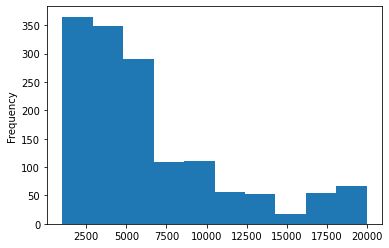

In [45]:
churn.MonthlyIncome.plot(kind='hist')

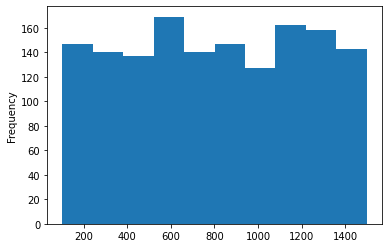

In [46]:
churn.DailyRate.plot(kind='hist')

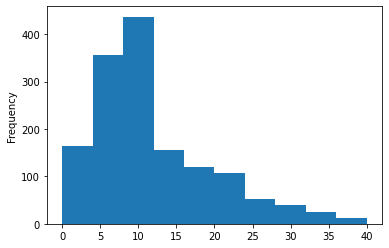

In [47]:
churn.TotalWorkingYears.plot(kind='hist')

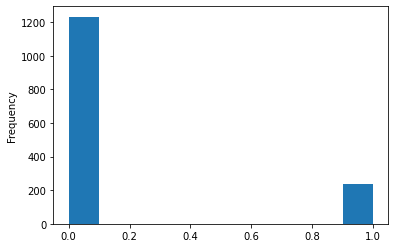

In [48]:
churn.Attrition.plot(kind='hist')

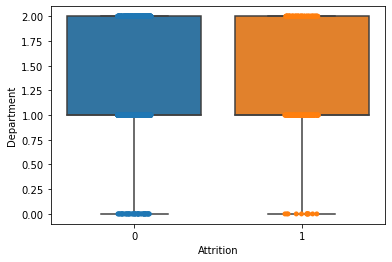

In [49]:
ax = sns.boxplot(x='Attrition', y='Department', data=churn)
ax = sns.stripplot(x='Attrition', y='Department', data=churn, jitter=True, edgecolor='gray')

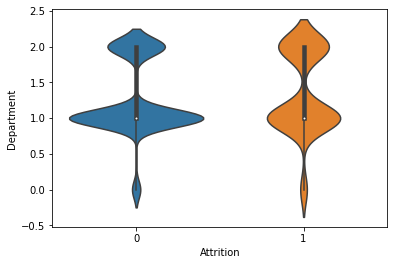

In [50]:
sns.violinplot(x='Attrition',y='Department',data=churn,size=6)

In [60]:
# Now, let's split our data into training and testing.

train, test = train_test_split(churn, test_size=0.2)
print(train.shape)
print(test.shape)

<IPython.core.display.Javascript object>

(1176, 25)
(294, 25)


In [61]:
#Pie chart will give the percentage of attrition and non-attrition

import plotly.offline as ply
values = pd.Series(churn["Attrition"]).value_counts()
trace = go.Pie(values=values)
ply.iplot([trace])

<IPython.core.display.Javascript object>

In [53]:
X=churn.loc[:, churn.columns != 'Attrition']
y=churn.loc[:, churn.columns == 'Attrition']

In [54]:
print("Shape of X is: {}".format(X.shape))
print("Shape of y is: {}".format(y.shape))

Shape of X is: (1470, 24)
Shape of y is: (1470, 1)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<IPython.core.display.Javascript object>

Now we will implement some of machine learning algorithms to know the accuracy, precision and recall.

In [56]:
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Accuracy',metrics.accuracy_score(prediction, y_test))
print(classification_report(prediction, y_test))

Accuracy 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       294
           1       0.00      0.00      0.00         0

    accuracy                           0.83       294
   macro avg       0.50      0.42      0.45       294
weighted avg       1.00      0.83      0.91       294



In [57]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Accuracy',metrics.accuracy_score(prediction, y_test))
print(classification_report(prediction, y_test))

Accuracy 0.8639455782312925
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       277
           1       0.27      0.76      0.39        17

    accuracy                           0.86       294
   macro avg       0.62      0.82      0.66       294
weighted avg       0.94      0.86      0.89       294



In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       287
           1       0.10      0.71      0.18         7

    accuracy                           0.84       294
   macro avg       0.55      0.78      0.55       294
weighted avg       0.97      0.84      0.90       294



In [59]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       246
           1       0.27      0.27      0.27        48

    accuracy                           0.76       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.76      0.76      0.76       294

